### Set up

In [1]:
#Import modules

import pandas as pd
pd.options.display.max_columns = 99
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# from numpy import arange, log10

from functions import chunk, agg, finalize
tunique = dd.Aggregation('tunique', chunk, agg,finalize)
first = dd.Aggregation('first', chunk, agg,finalize)

## Sourcing info
### Arrange data

In [2]:
# path = './../../../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013/''

### Load data directly

In [3]:
out = pd.read_csv('./../../data/processed/sourcing_strategies_qr.csv')
# out = pd.read_csv('./../data/export_bundles.csv')
out_ri = out.reset_index()
# product_count = out_ri.groupby('ID')[['CN ID 4']].nunique()
sources_count = out_ri.groupby('ID')[['PYOD']].nunique()
multisourcing_firms = sources_count[sources_count['PYOD'] > 1].index
df = out_ri.loc[out_ri.ID.isin(multisourcing_firms)]

In [4]:
firm_prod = df.groupby(['ID', 'CN ID 4']).sum()['VART'].reset_index()

firm_prod_pcts = firm_prod.groupby('ID')['VART'].apply(lambda x:
                                                 100 * x / float(x.sum()))
firm_prod['pct'] = firm_prod_pcts

### Show some examples of firm sourcing strategies in time

In [5]:
CN_full = pd.read_csv('./../../data/CN_full.csv', encoding = 'utf-8')

sample_ids = df.sample(20)['ID'].values

#Select firms that import more than 10% of some product
# df_ = firm_prod.loc[(firm_prod['CN ID 4'] == 601) & (firm_prod['pct'] > 1)]
# sample_ids = df_.sample(10)['ID'].values

for id_ in sample_ids:
    df_ID = df.loc[df.ID == id_]
    
    by_product = df_ID.groupby('CN ID 4')['VART'].sum().sort_values(ascending = False)
    by_product/=by_product.sum()
    main_prods = by_product[by_product.cumsum() < .99].index
    df_ID_mp = df_ID.loc[df_ID['CN ID 4'].isin(main_prods)]
    
    table = df_ID_mp.set_index([u'CN ID 4', u'PYOD', u'QUARTER', u'YEAR'])['VART'].unstack([-1, -2]).fillna(0)
#     table[('min','')] = 0; table[('max','')] = table.max().max()

    display(CN_full.set_index('CN ID 4')[['CN label 4']].drop_duplicates().loc[df_ID_mp['CN ID 4'].unique()].sort_index())

    display(table.T.style.bar(color='#d65f5f', vmin = 0, vmax = table.max().max()))

CN label 4
CN ID 4                                                   
2503     Sulphur of all kinds, other than sublimed sulp...
2712     Petroleum jelly; paraffin wax, microcrystallin...
2811     Other inorganic acids and other inorganic oxyg...
2817                             Zinc oxide; zinc peroxide
2822     Cobalt oxides and hydroxides; commercial cobal...
2907                              Phenols; phenol-alcohols
2921                              Amine-function compounds
3812     Prepared rubber accelerators; compound plastic...
3823     Industrial monocarboxylic fatty acids; acid oi...
3909     Amino-resins, phenolic resins and polyurethane...
4001     Natural rubber, balata, gutta-percha, guayule,...
4002     Synthetic rubber and factice derived from oils...
4005     Compounded rubber, unvulcanised, in primary fo...
4010     Conveyor or transmission belts or belting, of ...
4011                        New pneumatic tyres, of rubber
4016     Other articles of vulcanised rubber other than...
4901     Printed books, brochures, leaflets and similar...
4905     Maps and hydrographic or similar charts of all...
4908                             Transfers (decalcomanias)
5402     Synthetic filament yarn (other than sewing thr...
5403     Artificial filament yarn (other than sewing th...
5407     Woven fabrics of synthetic filament yarn, incl...
5902     Tyre cord fabric of high-tenacity yarn of nylo...
5906     Rubberised textile fabrics, other than those o...
7208     Flat-rolled products of iron or non-alloy stee...
7213     Bars and rods, hot-rolled, in irregularly woun...
7217                       Wire of iron or non-alloy steel
7326                       Other articles of iron or steel
7616                           Other articles of aluminium
8207     Interchangeable tools for hand tools, whether ...
8420     Calendering or other rolling machines, other t...
8463     Other machine tools for working metal or cerme...
8477     Machinery for working rubber or plastics or fo...
8479     Machines and mechanical appliances having indi...
8480     Moulding boxes for metal foundry; mould bases;...
8515     Electric (including electrically heated gas), ...
8708     Parts and accessories of the motor vehicles of...
9022     Apparatus based on the use of X-rays or of alp...

CN label 4
CN ID 4                                                   
511      Animal products not elsewhere specified or inc...
1302     Vegetable saps and extracts; pectic substances...
1515     Other fixed vegetable fats and oils (including...
2102     Yeasts (active or inactive); other single-cell...
2106     Food preparations not elsewhere specified or i...
2301     Flours, meals and pellets, of meat or meat off...
2816     Hydroxide and peroxide of magnesium; oxides, h...
2818     Artificial corundum, whether or not chemically...
2825     Hydrazine and hydroxylamine and their inorgani...
2827     Chlorides, chloride oxides and chloride hydrox...
2906     Cyclic alcohols and their halogenated, sulphon...
2912     Aldehydes, whether or not with other oxygen fu...
2913     Halogenated, sulphonated, nitrated or nitrosat...
2914     Ketones and quinones, whether or not with othe...
2915     Saturated acyclic monocarboxylic acids and the...
2916     Unsaturated acyclic monocarboxylic acids, cycl...
2917     Polycarboxylic acids, their anhydrides, halide...
2918     Carboxylic acids with additional oxygen functi...
2922                       Oxygen-function amino-compounds
2923     Quaternary ammonium salts and hydroxides; leci...
2924     Carboxyamide-function compounds; amide-functio...
2925     Carboxyimide-function compounds (including sac...
2929                Compounds with other nitrogen function
2930                              Organo-sulphur compounds
2932     Heterocyclic compounds with oxygen hetero-atom...
2933     Heterocyclic compounds with nitrogen hetero-at...
2934     Nucleic acids and their salts, whether or not ...
2935                                         Sulphonamides
2936     Provitamins and vitamins, natural or reproduce...
2937     Hormones, prostaglandins, thromboxanes and leu...
2938     Glycosides, natural or reproduced by synthesis...
2939     Vegetable alkaloids, natural or reproduced by ...
2941                                           Antibiotics
2942                               Other organic compounds
3204     Synthetic organic colouring matter, whether or...
3208     Paints and varnishes (including enamels and la...
3301     Essential oils (terpeneless or not), including...
3504     Peptones and their derivatives; other protein ...
3505     Dextrins and other modified starches (for exam...
3906                     Acrylic polymers in primary forms
3912     Cellulose and its chemical derivatives, not el...

CN label 4
CN ID 4                                                   
2806     Hydrogen chloride (hydrochloric acid); chloros...
2809     Diphosphorus pentaoxide; phosphoric acid; poly...
2811     Other inorganic acids and other inorganic oxyg...
2847     Hydrogen peroxide, whether or not solidified w...
3208     Paints and varnishes (including enamels and la...
3701     Photographic plates and film in the flat, sens...
3705     Photographic plates and film, exposed and deve...
3707     Chemical preparations for photographic uses (o...
3818     Chemical elements doped for use in electronics...
3920     Other plates, sheets, film, foil and strip, of...
3923     Articles for the conveyance or packing of good...
4202     Trunks, suitcases, vanity cases, executive-cas...
4901     Printed books, brochures, leaflets and similar...
4911     Other printed matter, including printed pictur...
7020                               Other articles of glass
8102     Molybdenum and articles thereof, including was...
8466     Parts and accessories suitable for use solely ...
8470     Calculating machines and pocket-size data-reco...
8471     Automatic data-processing machines and units t...
8472     Other office machines (for example, hectograph...
8473     Parts and accessories (other than covers, carr...
8481     Taps, cocks, valves and similar appliances for...
8504     Electrical transformers, static converters (fo...
8506                   Primary cells and primary batteries
8532     Electrical capacitors, fixed, variable or adju...
8533     Electrical resistors (including rheostats and ...
8534                                      Printed circuits
8536     Electrical apparatus for switching or protecti...
8541     Diodes, transistors and similar semiconductor ...
8542                        Electronic integrated circuits
8544     Insulated (including enamelled or anodised) wi...
8548     Waste and scrap of primary cells, primary batt...
9012     Microscopes other than optical microscopes; di...
9027     Instruments and apparatus for physical or chem...
9030     Oscilloscopes, spectrum analysers and other in...
9031     Measuring or checking instruments, appliances ...

CN label 4
CN ID 4                                                   
4202     Trunks, suitcases, vanity cases, executive-cas...
4203     Articles of apparel and clothing accessories, ...
6101     Men's or boys' overcoats, car coats, capes, cl...
6102     Women's or girls' overcoats, car coats, capes,...
6104     Women's or girls' suits, ensembles, jackets, b...
6105           Men's or boys' shirts, knitted or crocheted
6106     Women's or girls' blouses, shirts and shirt-bl...
6107     Men's or boys' underpants, briefs, nightshirts...
6108     Women's or girls' slips, petticoats, briefs, p...
6109     T-shirts, singlets and other vests, knitted or...
6110     Jerseys, pullovers, cardigans, waistcoats and ...
6111     Babies' garments and clothing accessories, kni...
6112     Tracksuits, ski suits and swimwear, knitted or...
6113     Garments, made up of knitted or crocheted fabr...
6114                  Other garments, knitted or crocheted
6116       Gloves, mittens and mitts, knitted or crocheted
6201     Men's or boys' overcoats, car coats, capes, cl...
6202     Women's or girls' overcoats, car coats, capes,...
6203     Men's or boys' suits, ensembles, jackets, blaz...
6204     Women's or girls' suits, ensembles, jackets, b...
6205                                 Men's or boys' shirts
6206     Women's or girls' blouses, shirts and shirt-bl...
6207     Men's or boys' singlets and other vests, under...
6208     Women's or girls' singlets and other vests, sl...
6209             Babies' garments and clothing accessories
6210     Garments, made up of fabrics of heading 5602, ...
6211     Tracksuits, ski suits and swimwear; other garm...
6212     Brassières, girdles, corsets, braces, suspende...
6214     Shawls, scarves, mufflers, mantillas, veils an...
6215                            Ties, bow ties and cravats
6601     Umbrellas and sun umbrellas (including walking...
9403                     Other furniture and parts thereof

CN label 4
CN ID 4                                                   
3901                Polymers of ethylene, in primary forms
3921     Other plates, sheets, film, foil and strip, of...
8468     Machinery and apparatus for soldering, brazing...
8477     Machinery for working rubber or plastics or fo...

CN label 4
CN ID 4                                                   
8432     Agricultural, horticultural or forestry machin...
8433     Harvesting or threshing machinery, including s...
8481     Taps, cocks, valves and similar appliances for...
9402     Medical, surgical, dental or veterinary furnit...

CN label 4
CN ID 4                                                   
7217                       Wire of iron or non-alloy steel
7228     Other bars and rods of other alloy steel; angl...
7229                             Wire of other alloy steel
7318     Screws, bolts, nuts, coach screws, screw hooks...
8207     Interchangeable tools for hand tools, whether ...
8460     Machine tools for deburring, sharpening, grind...
8462     Machine tools (including presses) for working ...

Empty DataFrame
Columns: [CN label 4]
Index: []

IndexError: list index out of range

CN label 4
CN ID 4                                                   
103                                             Live swine
5206     Cotton yarn (other than sewing thread), contai...
5402     Synthetic filament yarn (other than sewing thr...
5407     Woven fabrics of synthetic filament yarn, incl...
5903     Textile fabrics impregnated, coated, covered o...
8402     Steam or other vapour generating boilers (othe...
8422     Dishwashing machines; machinery for cleaning o...
8446                              Weaving machines (looms)
8448     Auxiliary machinery for use with machines of h...

CN label 4
CN ID 4                                                   
3923     Articles for the conveyance or packing of good...
4016     Other articles of vulcanised rubber other than...
7318     Screws, bolts, nuts, coach screws, screw hooks...
7320      Springs and leaves for springs, of iron or steel
8408     Compression-ignition internal combustion pisto...
8481     Taps, cocks, valves and similar appliances for...
8512     Electrical lighting or signalling equipment (e...
8707     Bodies (including cabs), for the motor vehicle...
8708     Parts and accessories of the motor vehicles of...

CN label 4
CN ID 4                                                   
3925     Builders' ware of plastics, not elsewhere spec...
4415     Packing cases, boxes, crates, drums and simila...
4418     Builders' joinery and carpentry of wood, inclu...
4421                                Other articles of wood
4911     Other printed matter, including printed pictur...
7008             Multiple-walled insulating units of glass
7610     Aluminium structures (excluding prefabricated ...
8302     Base-metal mountings, fittings and similar art...

CN label 4
CN ID 4                                                   
7007     Safety glass, consisting of toughened (tempere...
7318     Screws, bolts, nuts, coach screws, screw hooks...
8428     Other lifting, handling, loading or unloading ...
8432     Agricultural, horticultural or forestry machin...
8512     Electrical lighting or signalling equipment (e...
8536     Electrical apparatus for switching or protecti...
8701        Tractors (other than tractors of heading 8709)
8708     Parts and accessories of the motor vehicles of...

CN label 4
CN ID 4                                                   
2804             Hydrogen, rare gases and other non-metals
8433     Harvesting or threshing machinery, including s...

CN label 4
CN ID 4                                                   
601      Bulbs, tubers, tuberous roots, corms, crowns a...
602      Other live plants (including their roots), cut...
3920     Other plates, sheets, film, foil and strip, of...
4403     Wood in the rough, whether or not stripped of ...
5607     Twine, cordage, ropes and cables, whether or n...
6211     Tracksuits, ski suits and swimwear; other garm...
6810     Articles of cement, of concrete or of artifici...
8433     Harvesting or threshing machinery, including s...
9505     Festive, carnival or other entertainment artic...

Empty DataFrame
Columns: [CN label 4]
Index: []

IndexError: list index out of range

CN label 4
CN ID 4                                                   
1905     Bread, pastry, cakes, biscuits and other baker...

CN label 4
CN ID 4                                                   
2519     Natural magnesium carbonate (magnesite); fused...
4202     Trunks, suitcases, vanity cases, executive-cas...
5402     Synthetic filament yarn (other than sewing thr...
5404     Synthetic monofilament of 67 decitex or more a...
5607     Twine, cordage, ropes and cables, whether or n...
8301     Padlocks and locks (key, combination or electr...
8407     Spark-ignition reciprocating or rotary interna...
8445     Machines for preparing textile fibres; spinnin...
8447     Knitting machines, stitch-bonding machines and...
8448     Auxiliary machinery for use with machines of h...

CN label 4
CN ID 4                                                   
2712     Petroleum jelly; paraffin wax, microcrystallin...
2811     Other inorganic acids and other inorganic oxyg...
2817                             Zinc oxide; zinc peroxide
3812     Prepared rubber accelerators; compound plastic...
3909     Amino-resins, phenolic resins and polyurethane...
4001     Natural rubber, balata, gutta-percha, guayule,...
4002     Synthetic rubber and factice derived from oils...
4003     Reclaimed rubber in primary forms or in plates...
4005     Compounded rubber, unvulcanised, in primary fo...
4011                        New pneumatic tyres, of rubber
5407     Woven fabrics of synthetic filament yarn, incl...
5902     Tyre cord fabric of high-tenacity yarn of nylo...
7217                       Wire of iron or non-alloy steel
7315             Chain and parts thereof, of iron or steel
7326                       Other articles of iron or steel
8477     Machinery for working rubber or plastics or fo...
8480     Moulding boxes for metal foundry; mould bases;...
8537     Boards, panels, consoles, desks, cabinets and ...
8708     Parts and accessories of the motor vehicles of...

CN label 4
CN ID 4                                                   
2804             Hydrogen, rare gases and other non-metals
7404                                Copper waste and scrap
7602                             Aluminium waste and scrap
7802                                  Lead waste and scrap
7902                                  Zinc waste and scrap
8427     Fork-lift trucks; other works trucks fitted wi...

CN label 4
CN ID 4                                                   
3920     Other plates, sheets, film, foil and strip, of...
4910     Calendars of any kind, printed, including cale...
5007                Woven fabrics of silk or of silk waste
5112     Woven fabrics of combed wool or of combed fine...
5208     Woven fabrics of cotton, containing 85 % or mo...
5309                                 Woven fabrics of flax
5407     Woven fabrics of synthetic filament yarn, incl...
5408     Woven fabrics of artificial filament yarn, inc...
5516             Woven fabrics of artificial staple fibres
5801     Woven pile fabrics and chenille fabrics, other...
5808     Braids in the piece; ornamental trimmings in t...
5810       Embroidery in the piece, in strips or in motifs
5903     Textile fabrics impregnated, coated, covered o...
6110     Jerseys, pullovers, cardigans, waistcoats and ...
6204     Women's or girls' suits, ensembles, jackets, b...
6206     Women's or girls' blouses, shirts and shirt-bl...
6210     Garments, made up of fabrics of heading 5602, ...
9606     Buttons, press-fasteners, snap-fasteners and p...

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


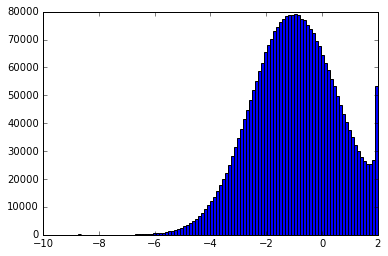

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.log10(firm_prod['pct']).replace(-np.inf, np.nan).dropna().values, 100)
plt.show()